In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
a = pd.read_csv('./../data/2/4/smp_quotations.csv')
a = a.sort_values(by='date')

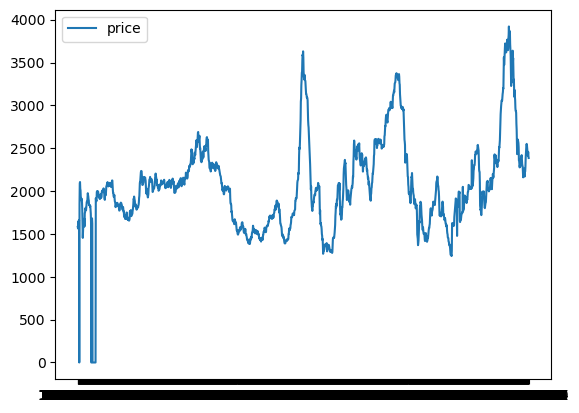

In [18]:
plt.plot(a['date'], a['price'], label='price')
plt.legend()

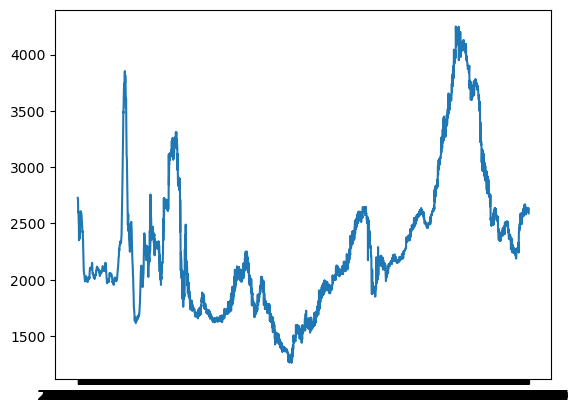

In [7]:
b = pd.read_csv('./../data/1/4/smp_quotations.csv')
b = b.sort_values(by='date')
plt.plot(b['date'], b['price'], label='price')

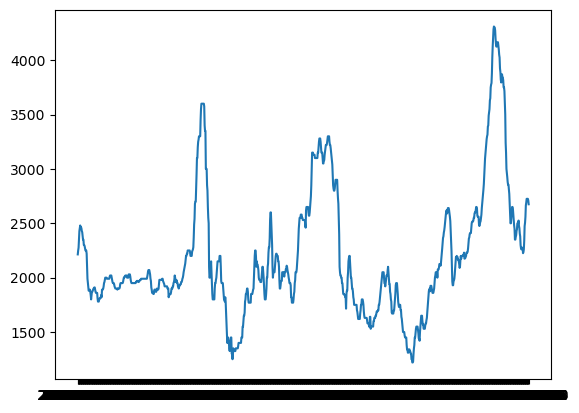

In [8]:
c = pd.read_csv('./../data/67/4/smp_quotations.csv')
c = c.sort_values(by='date')
plt.plot(c['date'], c['price'], label='price')

In [20]:
a.date.max()

'2023-12-21'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf

# ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is Stationary:', result[1] <= 0.05)

# ACF Plot
def plot_acf(series, lags=20):
    acf_values = acf(series, nlags=lags)
    plt.stem(range(1, lags + 1), acf_values[1:])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF)')
    plt.show()

# Apply ADF Test
adf_test(c['price'])


ADF Statistic: -3.002586128642589
p-value: 0.0346535931952513
Critical Values: {'1%': -3.436341508283391, '5%': -2.864185524365606, '10%': -2.5681785627437677}
Is Stationary: True


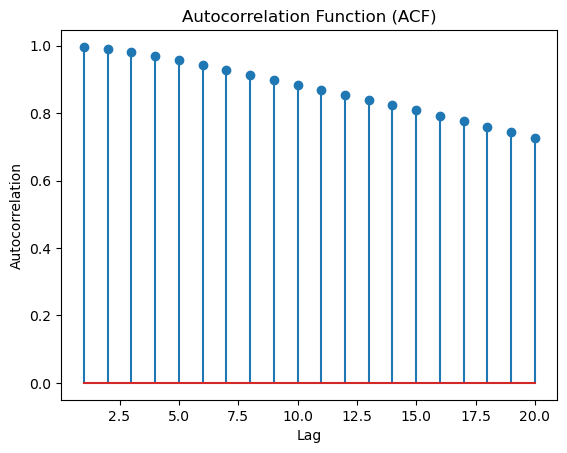

In [15]:
# Plot ACF
plot_acf(c['price'])

In [38]:
import pandas as pd

a = pd.read_csv('./../data/2/4/smp_quotations.csv')

a = a.sort_values(by='date')

a['date'] = pd.to_datetime(a['date'])
a.set_index('date', inplace=True)


b = pd.date_range(start=a.index[-1]  + pd.DateOffset(1), periods=10, freq='W-THU')
print(b)

DatetimeIndex(['2023-12-28', '2024-01-04', '2024-01-11', '2024-01-18',
               '2024-01-25', '2024-02-01', '2024-02-08', '2024-02-15',
               '2024-02-22', '2024-02-29'],
              dtype='datetime64[ns]', freq='W-THU')


In [30]:
a.index[-1]

Timestamp('2023-12-21 00:00:00')

In [32]:
a.index

DatetimeIndex(['1991-05-06', '1991-06-02', '1991-06-12', '1991-09-09',
               '1991-09-12', '1991-09-19', '1991-09-26', '1991-10-03',
               '1991-10-10', '1991-10-17',
               ...
               '2023-10-19', '2023-10-26', '2023-11-02', '2023-11-09',
               '2023-11-16', '2023-11-21', '2023-11-30', '2023-12-07',
               '2023-12-14', '2023-12-21'],
              dtype='datetime64[ns]', name='date', length=1802, freq=None)

In [33]:
a

,Unnamed: 0,id,data_series_id,product_id,data_source_id,data_interval,raw_currency,raw_unit,raw_price,currency,...,created_at.1,updated_at.1,id.2,product_group_id,name.1,slug,created_at.2,updated_at.2,deleted_at,type
date,,,,,,,,,,,,,,,,,,,,,
1991-05-06,7811,437350,961,4,133,weekly,USD,lb,0.8450,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-06-02,7809,437348,961,4,133,weekly,USD,lb,0.8425,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-06-12,7810,437349,961,4,133,weekly,USD,lb,0.8425,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-09-09,7807,437346,961,4,133,weekly,USD,lb,0.8975,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-09-12,7806,437345,961,4,133,weekly,USD,lb,0.8800,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,8194,572903,961,4,133,weekly,USD,lb,1.2075,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
2023-11-30,8207,634080,961,4,133,weekly,USD,lb,1.2000,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
2023-12-07,8217,897568,961,4,133,weekly,USD,lb,1.2000,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
